기한: 3월 15일 (금) 18:30


과제: 핸즈온 4장 모델 훈련 p.157-202 필사하여 깃허브에 업로드한 뒤, 깃허브 링크를 댓글로 달아주세요.

# Chapter4. 모델 훈련

-------------------
##### 1. 선형회귀
선형 모델을 훈련시키는 두 가지 방법
1. 공식을 사용하여 최적 모델 파라미터를 해석적으로 구한다.
2. 경사하강법(GD)을 사용하여 최적 모델 파라미터를 구한다.

(* 최적 모델 파라미터란 훈련 세트에 대해 비용 함수를 최소화하는 모델 파라미터를 말한다.)

##### 2. 다항회귀
다항회귀는 선형회귀보다 파라미터가 많아 과적합되기 쉽다.

따라서 학습 곡선을 사용하여 모델이 과적합되는지 감지하는 방법과 과적합을 감소시킬 수 있는 규제기법을 알아볼 것이다.



##### 3. 로지스틱 회귀 & 소프트맥스 회귀
--------------------------

## 4.1 선형 회귀

##### 선형 회귀 모델의 예측
ŷ = θ · x

- ŷ : 예측값
- n : 특성의 수
- xi : i번째 특성값
- x : x0부터 xn까지를 담은 샘플의 특성 벡터.
- θ : 편향(θ0)과 θ1부터 θn까지의 특성 가중치를 담은 모델의 파라미터 벡터

##### 선형 회귀 모델 훈련
1. 모델이 훈련 데이터에 얼마나 잘 들어맞는지 측정한다.
    회귀에서 가장 널리 사용되는 성능 측정 지표는 RMSE이다. 따라서 RMSE를 최소화하는 θ를 찾아야한다. 실제로는 MSE를 최소화하는 것이 같은 결과를 내면서 더 간단하다.

-------
### 4.1.1 정규방정식 (normal equation)

비용 함수를 최소화 하는 θ값을 찾기 위한 해석적인 방법이다.

즉 바로 결과를 얻을 수 있는 수학 공식이다.

- np.random.rand() : [0, 1)의 범위에서 균등하게 추출하여 N차원 배열을 생성

- np.random.randn() : 표준정규분포표에서 임의의 수를 추출한뒤, 그 수를 바탕으로 하는 N차원 배열을 생성

##### 1. 선형처럼 보이는 데이터 생성

In [3]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

##### 2. 정규방정식을 사용하여 θ-hat 계산

: 넘파이 선형 대수 모듈인 np.linalg 의 inv() 함수를 통해 역행렬 계산하고 dot() 메서드를 사용해 행렬 곱셈을 한다.

In [6]:
X_b = np.c_[np.ones((100, 1)), X]  # 모든 샘플에 x0 = 1을 추가합니다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [7]:
theta_best

array([[3.99499277],
       [2.89825065]])

정규 방정식으로 계산한 값을 확인해보니 θ0 = 3.99, θ1 = 2.89로 매우 비슷하지만 잡음 때문에 원래 함수의 파라미터인 θ0 = 4, θ1 = 3을 정확하게 재현하지는 못했다.

##### 3. θ-hat을 사용한 예측

In [8]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]  # 모든 샘플에 x0 = 1을 추가합니다.
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.99499277],
       [9.79149408]])

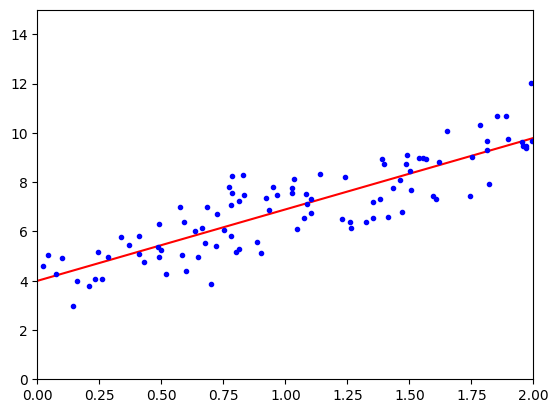

In [9]:
# 모델의 예측을 그래프로 나타내기
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

사이킷런에서 선형 회귀 수행하기

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

lin_reg.predict(X_new)

array([[3.99499277],
       [9.79149408]])

In [11]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)
theta_best_svd

array([[3.99499277],
       [2.89825065]])

In [9]:
np.linalg.pinv(X_b).dot(y)

array([[4.18426709],
       [2.87121526]])

- 유사 역행렬 (무어-펜로즈 역행렬)

: 특잇값 분해(SVD) 라 부르는 표준 행렬 분해 기법을 사용해 계산된다.


----
### 4.1.2 계산 복잡도 (computational complexity)

1) 
정규 방정식은 (n+1)x(n+1) 크기가 되는 X.T*X 의 역행렬을 계산한다. (n : 특성 수)

역행렬을 계산하는 "계산 복잡도"는 일반적으로 O(n^2.4) 에서 O(n^3) 사이이다.

ex. 특성 수가 2배로 늘어나면 계산 시간이 대략 2^2.4 = 5.3배 에서 2^3 = 8배로 증가한다

2) 

사이킷런의 LinearRegression 클래스가 사용하는 SVD 방법은 약 O(n^2)으로, 특성 수가 2배로 늘어나면 계산시간이 대략 4배가 된다.

3) 
정규 방정식이나 다른 알고리즘으로 학습된 선형 회귀 모델은 예측이 매우 빠르다. 예측 계산 복잡도는 샘플 수(m)와 특성 수(n)에 선형적이다. 만약 예측하려는 샘플이 2배로 늘어나면, 혹은 특성 수가 2배로 늘어나면 걸리는 시간도 거의 2배가 된다.

----
## 4.2 경사 하강법 (Gradient Descent)

- 특성이 매우 많고 훈련 샘플이 너무 많아 메모리에 모두 담을 수 없을 때 적합하다.
- 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘이다.
- 기본 아이디어 : 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정하는 것이다.

1. 파라미터 벡터 θ에 대해 비용 함수(MSE 등)의 현재 그래디언트를 계산한다
2. 그래디언트가 감소하는 방향으로 진행한다.
3. 그래디언트가 0이 되면 최솟값에 도달한 것이다.

+θ는 임의의 값으로 시작해서 **무작위 초기화**(random initialization)라고 하기도 한다.

##### 1. 학습률 파라미터
- 스텝의 크기를 의미
- 학습률이 너무 작으면 알고리즘이 수렴하기까지 많은 반복이 필요하므로 시간이 오래 걸린다.
- 학습률이 너무 크면 골짜기를 가로질러 이전보다 높은 곳으로 올라갈 수도 있다.

##### 2. 경사 하강법의 두 가지 문제점
1. 알고리즘이 전역 최솟값보다 지역 최솟값에 가까운 지점에서 시작하면 덜 좋은 지역 최솟값에 수렴한다.
2. 알고리즘이 평탄한 지역에서 시작하면 평탄한 지역을 지나기 위해 시간이 오래 걸리고 일찍 멈추게 되어 전역 최솟값에 도달하지 못한다.

##### 3. 볼록 함수
다행히 선형 회귀를 위한 MSE 비용 함수는 곡선에서 어떤 두 점을 선택해 선을 그어도 가로지르지 않는 볼록 함수이다.

- 이는 지역 최솟값이 없고 하나의 전역 최솟값만 있다는 뜻이다.

- 또한 연속된 함수이고 기울기가 갑자기 변하지 않는다.

-> 이 두 사실로부터 경사 하강법이 전역 최솟값에 가깝게 접근할 수 있다는 것을 보장한다.

(학습률이 너무 높지 않고 충분한 시간이 주어진다는 가정 하에)

##### 4. 특성 스케일에 따른 비용함수
비용 함수는 그릇 모양을 하고 있지만 특성들의 스케일에 따라 모양이 달라진다.

따라서 경사 하강법을 사용할 때는 반드시 모든 특성이 같은 스케일을 갖도록 만들어야한다.

그렇지 않으면 수렴하는 데 시간이 훨씬 오래 걸린다.

ex. 사이킷런의 StandardScaler를 사용하여 스케일을 같게 만들 수 있다.

----
### 4.2.1 배치 경사 하강법

##### 1. 편도 함수 (partial derivative)
- 경사 하강법을 구현하려면 각 모델 파라미터에 대해 비용 함수의 그래디언트를 계산해야 한다.
- 다시 말해 θ가 조금 변경될 때 비용 함수가 얼마나 바뀌는지 계산해야 한다.
- 이는 '동쪽을 바라봤을 때 발밑에 느껴지는 산의 기울기는 얼마인가?'와 같은 질문이다.

##### 2. 배치 경사 하강법 (batch gradient descent)
- 매 경사 하강법 스텝에서 전체 훈련 세트 X에 대해 계산한다.
- 큰 훈련 세트에서는 아주 느리다.
- 그러나 경사 하강법은 특성 수에 민감하지 않다. 따라서 수많은 특성에서 선형 회귀를 훈련시키려면 정규방정식이나 SVD 분해보다 경사 하강법을 사용하는 편이 훨씬 빠르다.
- 위로 향하는 그레디언트 벡터가 구해지면 반대 방향인 아래로 가야한다.
- 내려가는 스텝의 크기를 결정하기 위해 그레디언트 벡터에 학습률을 곱한다.

In [10]:
eta = 0.1   # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)   # 무작위 초기화

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

In [11]:
theta

array([[4.18426709],
       [2.87121526]])

정규방정식으로 찾은 것과 정확히 같은 결과를 낸다. 경사 하강법이 완벽하게 작동한 것이다.

---

그럼 학습률을 바꾸어 경사 하강법을 진행해보자.

1. 학습률 = 0.02

2. 학습률 = 0.1

3. 학습률 = 0.5

1번은 학습률이 너무 낮다. 알고리즘은 최적점에 도달하겠지만 시간이 오래 걸린다.
 
2번은 학습률이 적당하다. 반복 몇 번 만에 최적점에 수렴했다.

3번은 학습률이 너무 높다. 스텝마다 최적점에서 멀어져 발산한다. 

##### 3. 그리드 탐색
이처럼 적절한 학습률을 찾으려면 그리드 탐색을 사용한다. 하지만 그리드 탐색에서 수렴하는 데 너무 오래 걸리는 모델을 막기 위해 반복 횟수를 제한해야한다.

- 반복 횟수 지정 방법
: 반복 횟수를 아주 크게 지정하고 그래디언트 벡터가 아주 작아지면, 즉 벡터의 노름이 어떤  값(허용오차)보다 작아지면 경사 하강법이 거의 최솟값에 도달한 것이므로 알고리즘 중지한다.

-----
### 4.2.2 확률적 경사 하강법

##### 1. 배치 경사 하강법의 문제점
- 매 스텝에서 전체 훈련 세트를 사용해 그래디언트를 계산한다는 사실
- 훈련 세트가 커지면 매우 느려진다.

##### 2. 확률적 경사 하강법의 장점
- 매 스텝에서 한 개의 샘플을 무작위로 선택하고 해당 샘플에 대한 그래디언트를 계산한다.
- 매 반복에서 다뤄야 할 데이터가 매우 적기 때문에 한 번에 하나의 샘플을 처리하면 알고리즘이 훨씬 빠르다.
- 매 반복에서 하나의 샘플만 메모리에 있으면 되므로 매우 큰 훈련 세트도 훈련시킬 수 있다.

##### 3. 확률적 경사 하강법의 단점
- 확률적(무작위적)이기 때문에 배치 경사 하강법보다 훨씬 불안정하다.
- 시간이 지나면 최솟값에 근접하겠지만 요동이 지속되며 최솟값에 안착하지 못할 것이다.
- 알고리즘이 멈출 때 좋은 파라미터는 구해지겠지만 최적치는 아니다.
- 무작위성은 지역 최솟값에서 탈출시켜줘서 좋지만 알고리즘을 전역 최솟값에 다다르지 못하게 한다는 점에서는 좋지 않다.

##### 4. 딜레마 해결 방법 : 학습률을 점진적으로 감소시키기
-  담금질 기법 알고리즘과 유사
- 학습 스케쥴 : 매 반복에서 학습률을 결정하는 함수
- 학습률이 너무 빨리 줄어들면 지역 최솟값에 갇히거나 중간에 멈춰버릴 수 있다.
- 학습률이 너무 천천히 줄어들면 오랫동안 최솟값 주변을 맴돌거나 훈련을 너무 일찍 중지하여 지역 최솟값에 머무를 수 있다.

------

확률적 경사 하강법 구현


In [12]:
n_epochs = 50   # 각 반복 = 에포크
t0, t1 = 5, 50   # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2, 1)   # 무작위 초기화

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

- epoch(에포크) : 일반적으로 한 반복에서 m번(훈련세트 샘플 수만큼) 되풀이 되고, 이때 각 반복을 epoch라고 한다.

배치 경사 하강법 코드가 전체 훈련 세트에 대해 10000번 반복하는 동안 이 코드는 훈련 세트에서 50번만 반복하고도 매우 좋은 값에 도달했다.

In [13]:
theta

array([[4.15519598],
       [2.85587598]])

샘플을 무작위로 선택하기 때문에 어떤 샘플은 한 에포크에서 여러 번 선택될 수 있고 어떤 샘플은 전혀 선택되지 못할 수도 있다. 알고리즘이 에포크마다 모든 샘플을 사용하게 하려면 훈련 세트를 섞은 후 차례대로 하나씩 선택하고 다음 에포크에서 다시 섞는 식의 방법을 사용할 수 있다. 그러나 이렇게 하면 보통 더 늦게 수렴된다.

- SGDRegressor

: 사이킷런에서 SGD 방식으로 선형 회귀를 사용하려면 기본값으로 제곱 오차 비용 함수를 최적화하는  SGDRegressor 클래스를 사용한다.

In [14]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)  # max_iter : 최대 에포크 횟수. tol : 손실이 줄어들 때까지 실행되는 기준. eta0 : 학습률. penalty : 규제
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [15]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21028806]), array([2.90267706]))

여기서도 정규방정식으로 구한 값과 매우 비슷한 값을 얻었다.

-----
### 4.2.3 미니배치 경사 하강법 (mini-batch gradient descent)

- 배치 경사 하강법 : 각 스텝에서 전체 훈련 세트을 기반으로 그래디언트를 계산한다.
- 확률적 경사 하강법 : 각 스텝에서 하나의 샘플을 기반으로 그래디언트를 계산한다.
- 미니배치 경사 하강법 : **미니배치**라 부르는 임의의 작은 샘플 세트을 기반으로 그래디언트를 계산한다.


##### 미니배치 경사 하강법의 특징
- 행렬 연산에 최적화된 하드웨어, 특히 GPU를 사용해서 성능을 향상시킨다.
- 미니배치를 어느 정도 크게 하면 SGD보다 덜 불규칙하게 움직인다.
- 결국 미니배치 경사 하강법이 SGD보다 최솟값에 더 가까이 도달하게 될 것이다.
- 하지만 지역 최솟값에서 빠져나오기는 더 힘들 수 있다.


##### 세 가지 경사 하강법 알고리즘에 따른 훈련 과정동안 파라미터 공간에서 움직인 경로
- 배치 경사 하강법 : 실제로 최솟값에서 멈춤, 많은 시간이 소요됨.
- 확률적 경사 하강법 : 근처에서 맴돎, 적절한 학습 스케줄 사용하면 최솟값에 도달함.
- 미니배치 경사 하강법 : 근처에서 맴돎, 적절한 학습 스케줄 사용하면 최솟값에 도달함.

----
## 4.3 다항 회귀

- 비선형 데이터를 학습하는 데 사용하는 선형 모델
- 각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 기법

In [16]:
# 2차방정식으로 잡음이 포함된 비선형 데이터 생성
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

직선은 이 데이터에 잘 맞지 않을 것이다. 따라서 사이킷런의 PolynimialFeatures를 사용해 훈련 데이터 변환해본다. 여기서는 특성 하나가 추가되어 훈련 세트에 있는 각 특성을 제곱하여 새로운 특성으로 추가한다.

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

array([2.99421911])

X_poly는 원래 특성 X와 이 특성의 제곱을 포함한다. 이 확정된 훈련 데이터에 LinearRegression을 적용한다.

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.89613884]), array([[0.93946891, 0.5129853 ]]))

이처럼 특성이 여러 개일 때 다항 회귀는 이 특성 사이의 관계를 찾을 수 있다. (일반적인 선형 회귀 모델에서는 하지 못한다.) PolynomialFeatures가 주어진 차수까지 특성 간의 모든 교차항을 추가하기 때문이다.

----
## 4.4 학습 곡선

고차 다항 회귀를 적용하면 보통의 선형 회귀에서보다 훨씬 더 훈련 데이터에 잘 맞추려 할 것이다.

- 고차 다항 회귀 모델은 심각하게 훈련 데이터에 과대적합
- 선형 모델은 과소적합

모델이 데이터에 과대적합/과소적합 되었는지 아는 방법
1. 교차 검증 사용
- 훈련 데이터에서 성능이 좋지만 교차 검증 점수가 나쁘다면 과대적합된 것 -> 모델이 복잡하다.
- 양쪽에 모두 좋지 않으면 과소 적합 -> 모델이 단순하다.

2. 학습 곡선을 살펴보는 것
- 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기의 함수로 나타낸다.
- 단순히 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러번 훈련 시키면 된다.

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="훈련 세트")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="검증 세트")

- 훈련 데이터에서 학습 곡선을 그리는 함수 정의

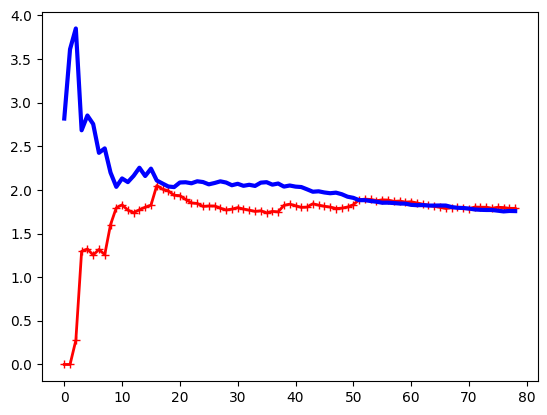

In [21]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

- 단순 선형 회귀 모델의 학습 곡선

(1) 훈련 데이터의 성능
- 그래프가 0에서 시작하므로 훈련 세트에 하나 혹은 두 개의 샘플이 이쓸 땐 모델이 완벽하게 작동
- 하지만 훈련 세트에 샘플이 추가됨에 따라 잡음도 있고 비선형이기 때문에 모델이 훈련 데이터를 완벽히 학습하는 것은 불가능

(2) 검증 데이터에 대한 모델의 성능
0 모델이 적은 수의 샘플로 훈련될 때는 제대로 일반화 x -> 검증 오차가 초기에 매우 크다
- 샘플이 추가됨에 따라 학습이 되고 검증 오차가 천천히 감소한다.


과소적합 모델 = 두 곡선이 수평한 구간을 만들고 꽤 높은 오차에서 매우 가까이 근접해있어

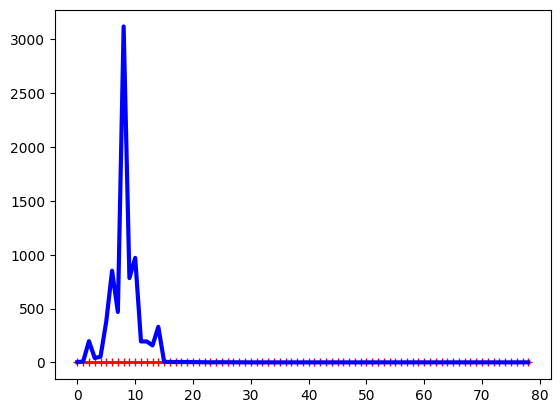

In [22]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)

- 10차 다항 회귀 모델의 학습 곡선

중요한 차이점
1. 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮다.
2. 두 곡선 사이에 공간이 있다. -> 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낫다는 뜻이고 이는 과대적합 모델의 특징

#### 편향/분산 트레이드오프
모델의 일반화 오차는 세 가지 다른 종류의 오차의 합으로 표현할 수 있다.
1. 편향
2. 분산
3. 줄일 수 없는 오차

모델의 복잡도가 커지면 분산이 커지고 편향이 줄어든다.

반대로 모델의 복잡도가 줄어들면 편향이 커지고 분산이 작아진다.

-----
## 4.5 규제가 있는 선형 모델

과대 적합을 감소시키는 좋은 방법 : 모델 규제

### 4.5.1 릿지 회귀

릿지 회귀
- 규제가 추가된 선형 회귀 버전
- 규제항이 비용 함수에 추가
- 학습 알고리즘을 데이터에 맞추는 것뿐만 아니라 모델의 가중치가 가능한 한 작게 유지되도록 노력
- 규제항 : 훈련하는 동안에만 비용 함수에 추가
- 모델의 훈련이 끝나면 모델의 성능을 규제가 없는 성능 지표로 평가

하이퍼파라미터 알파
- 모델을 얼마나 규제할지 조절
- 0이면 릿지 회귀는 선형 회귀와 같아진다.
- 알파가 아주 크면 모든 가중치가 거의 0에 가까워지고 결국 데이터의 평균을 지나는 수평선이 된다.

- 릿지 회귀의 비용 함수

- 선형 데이터에 몇 가지 다른 알파를 사용해 릿지 모델을 훈련시킨 결과
- 알파를 증가시킬 수록 직선에 가까워진다.
- 모델의 분산은 줄었지만 편향은 커지게 된다.

릿지 회귀 계산하기 위해 정규방정식 사용할 수도 있고 경사 하강법을 사용할 수도 있다.

In [23]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.2175773]])

- 정규방정식을 사용한 릿지 회귀 적용하는 예

In [24]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.21450881])

- 확률적 경사 하강법을 사용했을 때

--------
### 4.5.2 라쏘 회귀

- 선형 회귀의 또 다른 규제된 버전
- 릿지 회귀처럼 비용 함수에 규제항을 더하지만, 가중치 벡터의 l1 노름을 사용한다.

- 라쏘 회귀의 비용 함수

- 다양한 수준의 라쏘 규제를 사용한 선형 회귀와 다항 회귀

라쏘 회귀의 중요한 특징 : 덜 중요한 특성의 가중치를 제거하려고 한다는 점.(즉, 가중치가 0이 된다.)

-> 라쏘 회귀는 자동으로 특성 선택을 하고 희소 모델을 만든다.

- 라쏘와 다른 점
1. 첫째 파라미너터가 전역 최적점에 가까워질수록 그레이디언트가 작아진다. -> 경사 하강법이 자동으로 느려지고 수렴에 도움이 된다.
2. 알파를 증가시킬수록 최적의 파라미터가 원점에 더 가까워진다. 하지만 완전히 0이 되지는 않는다.

- 라쏘를 사용할 때 경사 하강법이 최적점 근처에서 진동하는 것을 막으려면 훈련하는 동안 점진적으로 학습률을 감소시켜야한다

In [25]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.18096636])

- Lasso 대신 SGDRegressor(penalty="l1") 사용 가능

-------
### 4.5.3 엘라스틱넷

- 릿지 회귀와 라쏘 회귀를 절충한 모델
- 규제항은 릿지와 회귀의 규제항을 단순히 더해서 사용하며, 혼합 저도는 혼합 비율 r을 사용하여 조절.
- r=0 : 릿지회귀
- r=1 : 라쏘 회귀

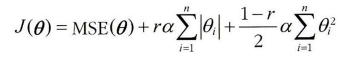

보통의 선형회귀, 릿지, 라쏘, 엘라스팃넷을 언제 사용해야할까?
- 규제가 약간 있는 것이 대부분의 경우에 좋으므로 일반적으로 평범한 선형 회귀는 피하기
- 릿지가 기본이 되지만 쓰이는 특성이 몇 개뿐이라고 의심되면 라쏘나 엘라스틱넷이 낫다.
- 특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관되어 있을 때는 보통 라쏘가 문제를 일으키므로 엘라스틱넷을 선호한다.

In [26]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([5.18195699])

----
### 4.5.4 조기 종료

- 경사 하강법과 같은 반복적인 학습 알고리즘을 규제하는 아주 색다른 방식은 검증 에러가 최솟값에 도달하면 바로 훈련을 중지시키는 것
- 에포크가 진행됨에 따라 알고리즘이 점차 학습되어 훈련 세트에 대한 예측 에러(RMSE)와 검증 세트에 대한 예측 에러 줄어든다.
- 그러다 다시 상승한다. -> 모델이 훈련 데이터에 과대적합되기 시작하는 것 의미

조기 종료는 검증 에러가 최소에 도달하는 즉시 훈련을 멈추는 것

In [27]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
X_train, X_val, y_train, y_val=train_test_split(X, y, test_size=0.2)

# 데이터 준비
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias = False)),
    ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train.ravel())   # 훈련을 이어서 진행합니다.
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

- warm_start = True로 지정하면 fit() 메서드가 호출될 때 처음부터 다시 시작하지 않고 이전 모델 파라미터에서 훈련을 이어간다.

-----
## 4.6 로지스틱 회귀

-----
### 4.6.1 확률 추정

로지스틱은 0과 1 사이의 값을 출력하는 시그모이드 함수이다.

로지스틱 회귀 모델이 샘플 x가 양성 클래스에 속할 확률 phat = h(x)를 추정하면 이에 대한 예측 yhat을 쉽게 구할 수 있다.

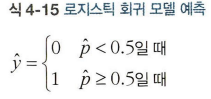

-----
### 4.6.2 훈련과 비용 함수

- 훈련의 목적
: 양성 샘플(y=1)에 대해서는 옾은 확률을 추정하고 음성 샘플(y=0)에 대해서는 낮은 확률을 추정하는 모델의 파라미터 벡터 θ를 찾는 것

이 비용 함수는 t가 0과 1에 가까워지면 -log(t)와 -log(1-t)가 매우 커지므로 타당하다 할 수 있다.  따라서 음성 샘플의 확률을 0에 가깝게 추정하거나 양성 샘플의 확률을 1에 가깝게 추정하면 비용은 0에 가까워진다.

- 로그 손실(log loss) : 전체 훈련 세트에 대한 비용 함수는 모든 훈련 샘플의 비용을 평균한 것

-----
### 4.6.3 결정 경계

꽃잎의 너비를 기반으로 Iris-Versicolor 종을 감지하는 분류기를 만들어보자.

In [28]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [29]:
X = iris['data'][:, 3:] # 꽃잎의 너비
y = (iris['target']==2).astype(int) # 1 Iris-Virginica면 1, 아니면 0

In [30]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

꽃잎의 너비가 0~3cm인 꽃에 대해 모델의 추정 확률을 계산해보자.

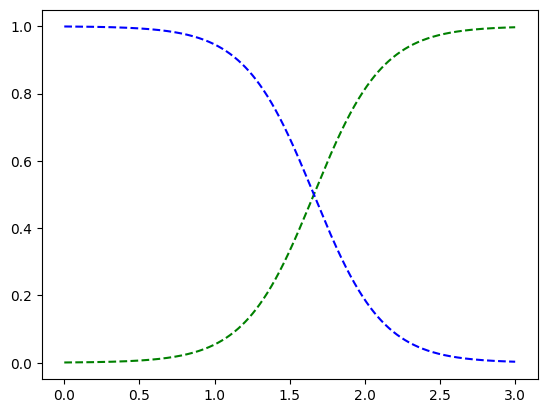

In [31]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], "g--", label="Iris virginica")
plt.plot(X_new, y_proba[:,0], "b--", label="Not virginica")

In [32]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

-----
### 4.6.4 소프트맥스 회귀 (다항 로지스틱 회귀)

- 소프트맥스 회귀 모델

: 로지스틱 회귀 모델을 여러 개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화된 것.

: 추정 확률이 가장 높은 클래스를 선택한다.

1. 샘플 x가 주어지면 소프트맥스 회귀 모델이 각 클래스 k에 대한 점수를 계산하고
2. 그 점수에 소프트맥스 함수를 적용하여 각 클래스의 확률을 추정한다.
3. 각 클래스는 자신만의 파라미터 벡터 θ가 있어 이 벡터들은 파라미터 행렬에 행으로 저장된다.
4. 샘플 x에 대해 각 클래스의 점수가 계산되면 소프트맥스 함수를 통과시켜 클래스 k에 속할 확률을 추정한다. (이 함수는 각 점수에 지수 함수를 적용한 후 정규화한다)
5. 일반적으로 이 점수를 '로짓' 또는 '로그-오즈'라고 부른다.

1. 훈련 방법
(1) 목적 : 모델이 타깃 클래스에 대해서 높은 확률을 추정하도록 만드는 것
ex. 크로스 엔트로피 비용 함수를 최소화 하는 것은 타깃 클래스에 대해 낮은 확률을 예측하는 모델을 억제하므로 이 목적에 부합한다.
(2) 각 클래스에 대한 그래디언트 벡터를 계산할 수 있으므로 비용함수를 최소화하기 위한 파라미터 행렬θ를 찾기 위해 경사 하강법을 사용할 수 있다.

-----
소프트맥스 회귀를 사용해 붓꽃을 세 개의 클래스로 분류해보자.

- 사이킷런의 LogisticRegression은 클래스가 둘 이상일 때 기본적으로 일대다(OvA) 전략을 사용한다.
- 하지만 multi_class 매개변수를 "multinomial"로 바꾸면 소프트맥스 회귀를 사용할 수 있다. 
- 소프트맥스 회귀를 사용하려면 solver 매개변수에 "lbfgs"와 같이 소프트맥스 회귀 지원하는 알고리즘 지정해야한다.
- 기본적으로 하이퍼파라미터 C 사용하여 조절할 수 있는 l2 규제가 적용된다.

In [33]:
X = iris["data"][:, (2,3)] # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [34]:
softmax_reg.predict([[5,2]])

array([2])

In [35]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

꽃잎의 길이가 5cm, 너비가 2cm인 붓꽃을 발견했다고 가정하고 이 붓꽃의 품종이 무엇인지 모델에 질의하면 94.2%의 확률로 Virginica (클래스2) 라고 출력할 것이다.